# DPCN Assignment 2
## Team 6
- Tathagato Roy, 2019111020
- Abhishek Mittal , 
- Adwait Raste,

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math


In [2]:
SEED = 42
random.seed(SEED)

## Q1. 
Construct a matrix M , where the elements are drawn from a normal distribution: N (0, 1). Assuming the size of M is fixed at N = 500, and the diagonal elements are constant and fixed at D (where D > 0), plot all the eigen values (λ) in the complex plane (Imag(λ) vs Real (λ)) for four sets of D: -5, -1, 0, 1 and 5.  
(a) What kind of shapes do those plots have, in your opinion? Can you provide an explanation for why the specific form is present in each of the figures?  
(b) Explain the effect of D (check whether the shapes are changing gradually, or it is shifting along the real line / imaginary line)  
(c) What will happen if the matrix is real and symmetric?  
(d) What will happen if the elements in the matrix are correlated? (e.g if Mij > 0 then Mji < 0).

In [ ]:
def make_matrix(N, D):
    A = np.random.randn(N,N)
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i,j] = D
    # print(A)
    return A

def eigen(G):
    return np.linalg.eigvals(G)

### (a) Plot Imaginary vs Real $\lambda$, for N=500.

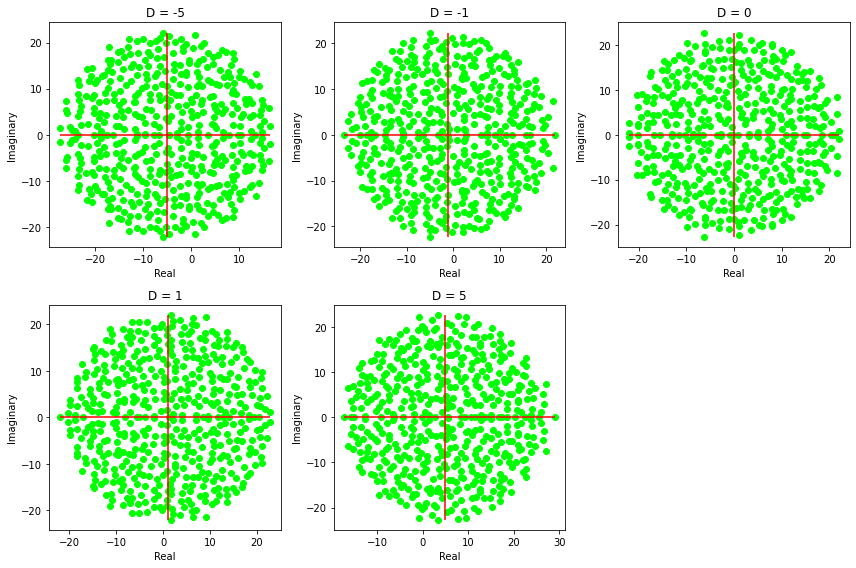

In [ ]:
D_range = [-5,-1,0,1,5]
fig = plt.figure(figsize=(12,8))

for idx,d in enumerate(D_range):
    G = make_matrix(500, d)
    eigv = eigen(G)
    plt.subplot(230+idx+1)
    plt.scatter(x=eigv.real, y=eigv.imag, color='lime')
    plt.title(f'D = {d}')
    plt.vlines(d, min(eigv.imag), max(eigv.imag), linestyle = 'solid', color='red')
    plt.hlines(0, min(eigv.real), max(eigv.real), linestyle = 'solid', color='red')
    # plt.xlim(-35,35)
    # plt.ylim(-35,35)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
plt.tight_layout()
plt.show()

Explanation:
The eigenvalues of a random graph are expected to be distributed in the complex plane according to the circular law, which states that the eigenvalues of a large random matrix with independent, identically distributed entries follow a circular distribution in the complex plane, centered at the origin with radius proportional to the square root of the matrix size.

For a random graph constructed from a normal distribution with constant diagonal elements, the circular law predicts that the eigenvalues will be distributed uniformly around the origin of the complex plane, forming a circle or a disk. The shape of the plot would be circular, with no discernible pattern or structure, similar to the plot for a typical random graph.

However, the specific properties of the normal distribution used to construct the graph can affect the distribution of eigenvalues and the shape of the plot. For example, if the distribution has a heavy tail or a strong correlation structure, the eigenvalues may deviate from the circular law and exhibit non-uniform distribution or clustering. Therefore, the exact shape of the plot would depend on the details of the distribution and the properties of the resulting graph.

### (b) The shape remains the same as before, but is shifting along the Real axis.

### (c) Real and symmetric

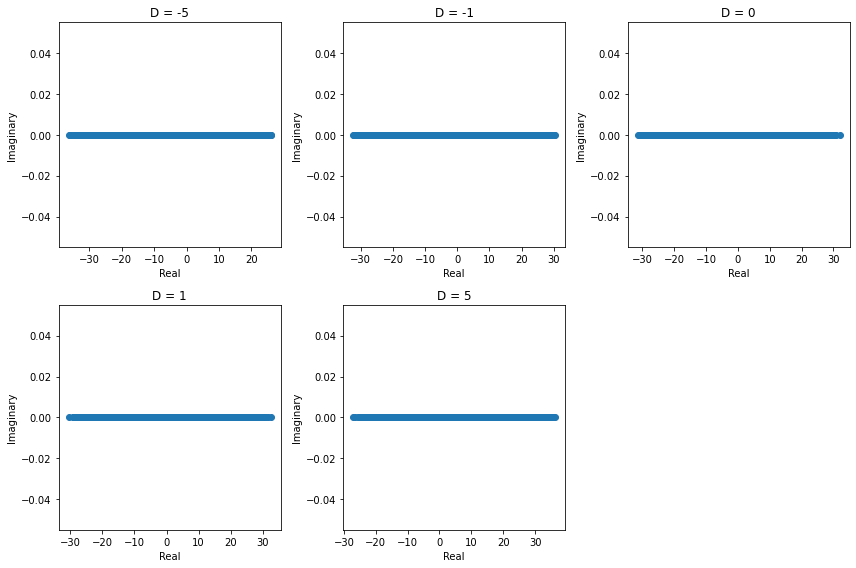

In [ ]:
D_range = [-5,-1,0,1,5]
fig = plt.figure(figsize=(12,8))

for idx,d in enumerate(D_range):
    G = make_matrix(500, d)
    G = 0.5 *(G + G.T)
    eigv = eigen(G)
    plt.subplot(230+idx+1)
    plt.scatter(x=eigv.real, y=eigv.imag)
    plt.title(f'D = {d}')
    # plt.xlim(-35,35)
    # plt.ylim(-35,35)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
plt.tight_layout()
plt.show()

**Reason**: A square matrix has real eigenvalues if and only if it is a real symmetric matrix. So in the above plots, the imaginary part is always zero.

### (d) Correlated elements in matrix. if Mij > 0 then Mji < 0. 

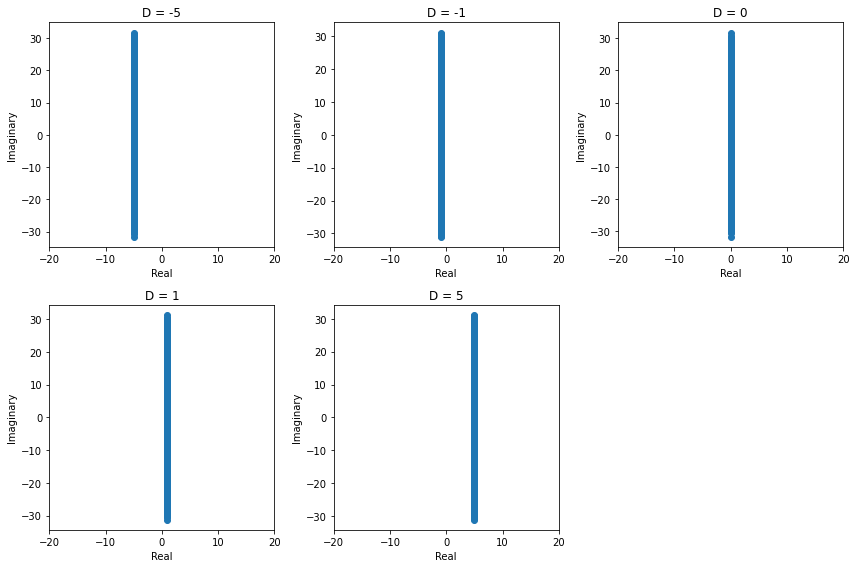

In [ ]:
# Antisymmetric
D_range = [-5,-1,0,1,5]
fig = plt.figure(figsize=(12,8))
N=500
for idx,d in enumerate(D_range):
    G = make_matrix(N, d)
    G = 0.5 *(G + G.T)
    for i in range(N):
        for j in range(i+1,N):
                G[j,i] = -G[i,j]
    eigv = eigen(G)
    plt.subplot(230+idx+1)
    plt.scatter(x=eigv.real, y=eigv.imag)
    plt.title(f'D = {d}')
    plt.xlim(-20,20)
    # plt.ylim(-35,35)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
plt.tight_layout()
plt.show()

**Reason:** A square matrix has purely imaginary eigenvalues if and only if it is a skew-symmetric matrix. In our case, we have an antisymmetrix matrix, but with a constant value of diagonals. So the real part is not zero, but is constant and equal to the value of D chosen.

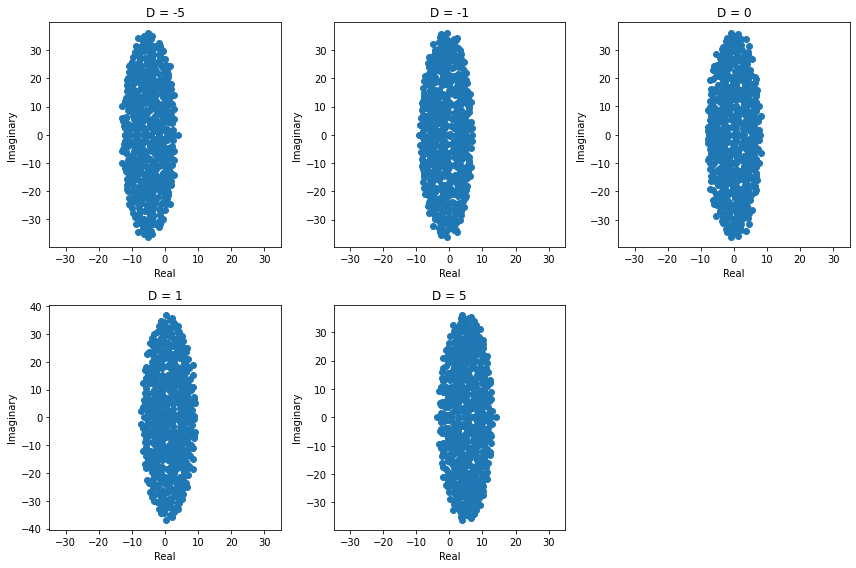

In [ ]:
D_range = [-5,-1,0,1,5]
fig = plt.figure(figsize=(12,8))
N=500
for idx,d in enumerate(D_range):
    G = make_matrix(N, d)
    for i in range(N):
        for j in range(i+1,N):
            if np.sign(G[i,j]) == np.sign(G[j,i]):
                G[j,i] *= -1
    eigv = eigen(G)
    plt.subplot(230+idx+1)
    plt.scatter(x=eigv.real, y=eigv.imag)
    plt.title(f'D = {d}')
    plt.xlim(-35,35)
    # plt.ylim(-35,35)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
plt.tight_layout()
plt.show()

**Reason:** This matrix has correlated terms, i.e. the sign of M(i,j) and M(j,i) is always opposite, which is similar to a skew-symmetric matrix in some sense. So the plots are skewed showing lesser range in real axis, and more values in the imaginary axis.

The real and imaginary parts of the eigenvalues of a graph's adjacency matrix can provide important information about the graph's structure and properties. Specifically:

**Real part:** The real part of an eigenvalue is related to the graph's connectivity and can provide information about the number of connected components in the graph. If the real part of an eigenvalue is zero, then the graph is not connected. If the real part is positive, then the graph has a single connected component. If the real part is negative, then the graph has multiple connected components.

**Imaginary part:** The imaginary part of an eigenvalue is related to the graph's symmetry and can provide information about the presence of certain types of subgraphs or motifs. In particular, the imaginary part of an eigenvalue is zero if and only if the graph is symmetric with respect to a certain axis. This symmetry can be used to identify subgraphs that are topologically equivalent, such as cycles or cliques.



## Q2. 
Construct a complex network of size N =1000. At first, store the size of the largest connected component (GCC) of that network. Then remove randomly chosen
nodes by a small fraction (f) from that network and consider the largest connected component as the new network (eliminating all nodes which are now isolated after deletion). Plot the relative size of the largest connected
components (ξ = size ofN GCC ) with respect to the fraction of node removed (f).

Graph following Poisson distribution of degree for large graphs is given the Erdos-Renyl Graph.
The second type of Graph is the Scale Free Graph

In [21]:
N = 1000
max_nodes_to_be_removed = 0.9 * N
#p = [0.5, 0.25, 0.60, 0.75]
average_degree = [4,6,8]
colors = ['red','green','cyan','blue','black']    

def get_expected_probability_of_an_edge(N,k):
    """ given N size of the network and average degree 
        computes the probability of an edge between any 
        two nodes for Erdos Renyl Graphs """
    return k / (N - 1)
def construct_erdos_renyl(n, deg , seed = SEED):
    G = nx.erdos_renyi_graph(n, get_expected_probability_of_an_edge(n,deg), seed = seed)
    return G
def construct_scale_free_graph(n, m, seed = SEED):
    G = nx.barabasi_albert_graph(n, m, seed = SEED)
    return G
def generate_random_nodes_to_be_removed(f,n):
    """ generate f nodes to be removed without replacement from a graph of N nodes """
    return np.random.choice(n, f, replace = False)

def compute_relative_size_of_largest_connected_component(G, N):
    cc_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]
    #print("Number of Connected components : {0}".format(len(cc_sizes)))
    size = G.number_of_nodes()
    #print("size of the Graph : {0}  and size of the largest component : {1}".format(size,cc_sizes[0] ))
    return cc_sizes[0] / size

def compute_triangle(G):

    num_triangles = nx.triangles(G)
    total_triangles = 0
    for key in num_triangles:
        total_triangles += num_triangles[key]
    return total_triangles / 3
def generate_average_shortest_path(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else :
        return N + 1000

def generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed):
    """ generate gcc against ratio f """ 
    size = 0
    original_size = G.number_of_nodes()
    f = []
    relative_size_of_gcc = []
    triangles = []
    average_shortest_paths = []
    max_removed = len(nodes_to_be_removed)
    for i in range(max_removed):
        node = nodes_to_be_removed[i]
        #print("removing node : {0}".format(node))
        G.remove_node(node)
        num_triangles = compute_triangle(G)
        ratio = (i+1) / N
        average_shortest_path = generate_average_shortest_path(G)
        relative_size = compute_relative_size_of_largest_connected_component(G, original_size)
        relative_size_of_gcc.append(relative_size)
        average_shortest_paths.append(average_shortest_path)
        f.append(ratio)
        triangles.append(num_triangles)
        #print("Number of Nodes removed : {0} and the relative GCC size : {1}".format(ratio, relative_size))
        if i % 499 == 0:
            print("Progress : {0}".format(i*100 / len(nodes_to_be_removed)))
    
    return f, triangles, relative_size_of_gcc, average_shortest_paths


def generate_data_for_Erdos_Renyi():
    Triangles = []
    F = []
    Gcc_Size = []
    Average_Shortest_Lengths = []
    for i, deg in enumerate(average_degree):
        G = construct_erdos_renyl(N,deg)
        nodes_to_be_removed = generate_random_nodes_to_be_removed(int(max_nodes_to_be_removed), N)
        print(G.number_of_nodes())
        f, triangles, relative_size_of_gcc, average_shortest_lengths = generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed)
        F.append(f)
        Triangles.append(triangles)
        Gcc_Size.append(relative_size_of_gcc)
        Average_Shortest_Lengths.append(average_shortest_lengths)

    return F, Triangles, Gcc_Size, Average_Shortest_Lengths
def generate_data_for_Scale_Free():
    Triangles = []
    F = []
    Gcc_Size = []
    Average_Shortest_Lengths = []

    for i, deg in enumerate(average_degree):
        G = construct_scale_free_graph(N, deg // 2)
        nodes_to_be_removed = generate_random_nodes_to_be_removed(int(max_nodes_to_be_removed), N)
        print(G.number_of_nodes())
        f, triangles, relative_size_of_gcc, average_shortest_lengths = generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed)
        F.append(f)
        Average_Shortest_Lengths.append(average_shortest_lengths)
        Triangles.append(triangles)
        Gcc_Size.append(relative_size_of_gcc)
    return F, Triangles, Gcc_Size, Average_Shortest_Lengths

def Draw_GCC_Figures(F, Gcc_Size, graph_type = "Erdos Renyi"):
    #print(Gcc_Size[1])
    #print(Gcc_Size[2])





    for i,deg in enumerate(average_degree):
            plt.plot(F[i], Gcc_Size[i], color = colors[i], label = "average degree = " + str(deg))
            plt.legend()
            plt.xlabel("F (ratio of node removed)")
            plt.ylabel("Relative Size of the Largest Components")
            plt.title("Relative Size vs F  for " + graph_type)
            plt.xlim(0,1.10)


def Draw_Triangle_Figures(F, Triangles, graph_type = "Erdos Renyi"):
        for i,deg in enumerate(average_degree):
            plt.plot(F[i], Triangles[i], color = colors[i], label = "average degree = " + str(deg))
            plt.legend()
            plt.xlabel("F (ratio of node removed)")
            plt.ylabel("Number of Triangles")
            plt.title("Number of Triangles vs F for " + graph_type)
            plt.xlim(0,1.10)

def Draw_Shortest_Figures(F, SPs, graph_type = "Erdos Renyi"):
        for i,deg in enumerate(average_degree):
            plt.plot(F[i], SPs[i], color = colors[i], label = "average degree = " + str(deg))
            plt.legend()
            plt.xlabel("F (ratio of node removed)")
            plt.ylabel("Average Shortest Path")
            plt.title("Average Shortest Path vs F for " + graph_type)
            plt.xlim(0,1.10)





        
        
    
        

        
    


    
    

        
        
        
    
    
    
    
    


In [11]:
print("Erdos Renyi")
F1, Triangles1, Gcc_Size1, Average_Shortest_Lengths1 = generate_data_for_Erdos_Renyi()

1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444


NetworkXError: Barabási–Albert network must have m >= 1 and m < n, m = 0, n = 1000

In [17]:
print("Scale Free")
F2, Triangles2, Gcc_Size2, Average_Shortest_Lengths2 = generate_data_for_Scale_Free()


Scale Free
1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444


In [26]:
gtype_1 = "Erdos Renyi"
gtype_2 = "Scale Free Network"

### Scale Free

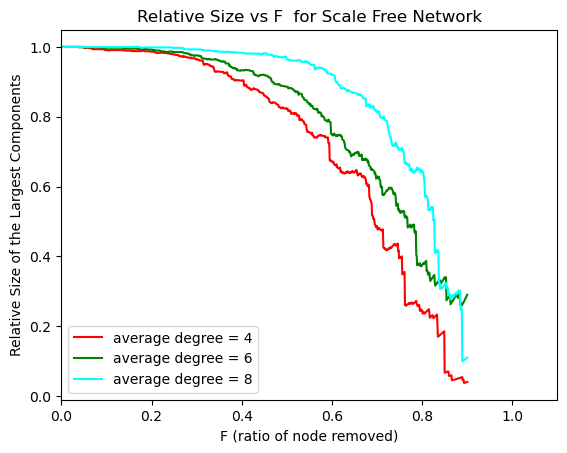

In [27]:
Draw_GCC_Figures(F2, Gcc_Size2, graph_type = gtype_2)

### Erdos Renyl

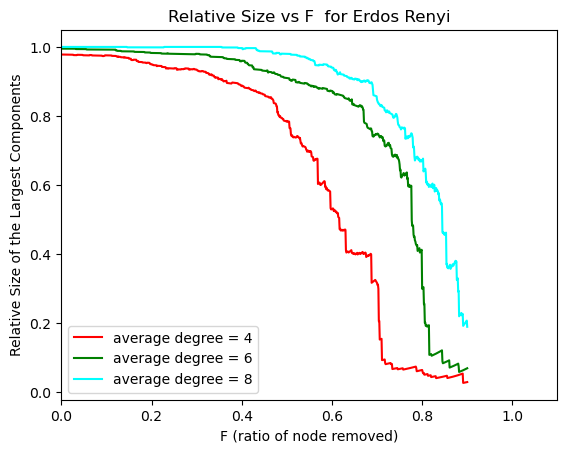

In [23]:
Draw_GCC_Figures(F1, Gcc_Size1)

### (a) What is the critical value (fc ) of f , in which ξ will reach to zero (Note: There will be significant jump in the size of GCC around that critical point)?


For Erdos Renyl Graph with Average Degree 
$$\text{Degree : } 4 \text{  }   f_c = 0.7$$
$$\text{Degree : } 6 \text{  }   f_c = 0.8$$
$$\text{Degree : } 8 \text{  }   f_c = 0.8$$

For Scale Free Graph with Average Degree 
$$\text{Degree : } 4 \text{  }   f_c = 0.9$$
$$\text{Degree : } 6 \text{  }   f_c = 0.9$$
$$\text{Degree : } 8 \text{  }   f_c = 0.9$$


### (b) Plot the number of triangles exist in largest giant components with respect to f .

### Erdos Renyii


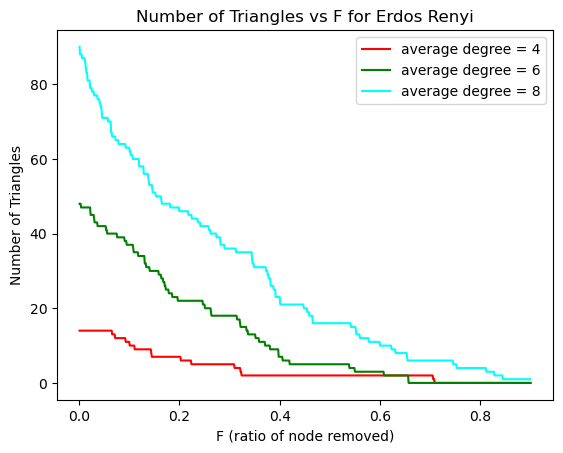

In [16]:
Draw_Triangle_Figures(F1, Triangles1, graph_type = "Erdos Renyi")

### Scale Free

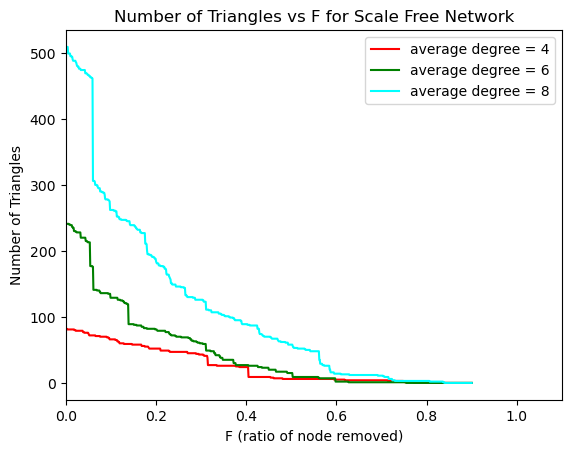

In [28]:
Draw_Triangle_Figures(F2, Triangles2, graph_type = gtype_2)

### (c) Plot a graph of average path-length vs f . Use two types of graphs : (I) random graph following Poissonian degree distribution (II) scale free network.

### Erdos Renyi

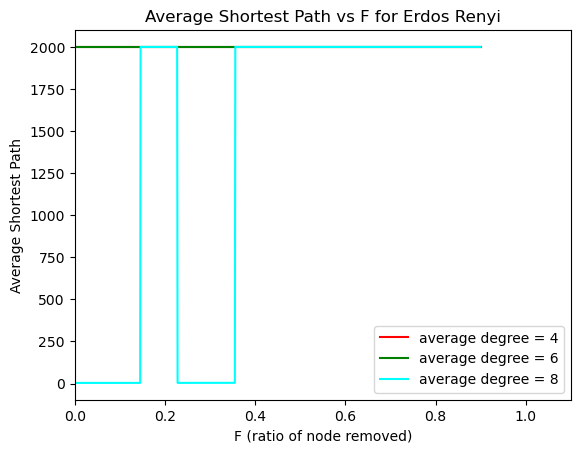

In [30]:
Draw_Shortest_Figures(F1, Average_Shortest_Lengths1, graph_type = "Erdos Renyi")

### Scale Free Networks 

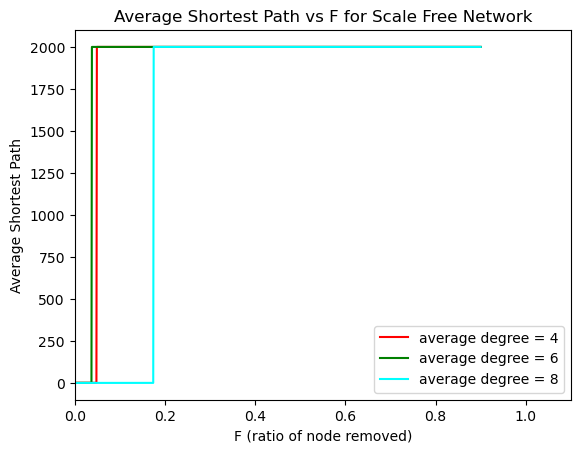

In [31]:
Draw_Shortest_Figures(F2, Average_Shortest_Lengths2, graph_type = gtype_2)

## Q3. 
Construct a random network of size N =1000. Initially, consider two percent of randomly chosen nodes are in state −1. All the other nodes are in state +1. Each
steps of the evolution, one random node will be chosen.  
For each steps, two protocols will be followed:  
(I) If the randomly chosen node is in +1 state, check its adjacent neighbors. If any of its neighbours are in −1 state, then there is a probability (p) that randomly chosen node will change its state to -1.  
(II) If the randomly chosen node is in −1 state, it will change its state with a probability γ=0.8.

In [ ]:
n_nodes = 1000
p_connect = 0.1

p_neg = 0.02

n_neg = int(n_nodes * p_neg)

adj_matrix = np.zeros((n_nodes, n_nodes))
for i in range(n_nodes):
  for j in range(i+1, n_nodes):
    if np.random.rand() < p_connect:
      adj_matrix[i, j] = 1
      adj_matrix[j, i] = 1

og_state = np.ones(n_nodes)
neg_indices = np.random.choice(n_nodes, size=n_neg, replace=False)
og_state[neg_indices] = -1

In [ ]:
# G = nx.from_numpy_array(adj_matrix)
# pos = nx.spring_layout(G)
# nx.draw(G, pos=pos, with_labels=False)
# plt.figure(figsize=(12,12)) 
# plt.show()

In [ ]:
### 2000 and 10000 runs
p = [0.1, 0.5, 0.8]
gamma = 0.8
ev_minus_2000 = [[], [], []]
ev_pos_2000 = [[], [], []]
ev_minus = [[], [], []]
ev_pos = [[], [], []]
for j in range(3):
    init_state = og_state.copy()
    for i in range(10000):
        random_number = random.randint(0, n_nodes-1)
        if init_state[random_number] == 1:
            node_index = random_number
            neighbors = np.where(adj_matrix[node_index] == 1)[0]
            if -1 in init_state[neighbors]:
                if np.random.rand() < p[j]:
                    init_state[random_number] = -1
        elif init_state[random_number] == -1:
            if np.random.rand() < gamma:
                init_state[random_number] = 1
        frac = np.sum(init_state == 1)/n_nodes
        if i < 2000:
            ev_pos_2000[j].append(frac)
            ev_minus_2000[j].append(1-frac)
        ev_pos[j].append(frac)
        ev_minus[j].append(1 - frac)


### (a) Plot the long term evolution of fraction of nodes which is in −1 state (for p = 0.1, 0.5, and 0.9)

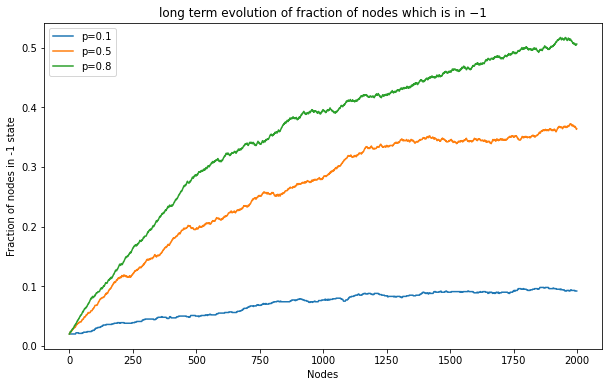

In [ ]:
plt.figure(figsize=(10,6))
for j in range(3):
    plt.plot(ev_minus_2000[j], label = f"p={p[j]}")
    plt.title("long term evolution of fraction of nodes which is in −1")
    plt.xlabel("Nodes")
    plt.ylabel("Fraction of nodes in -1 state")
    plt.legend()

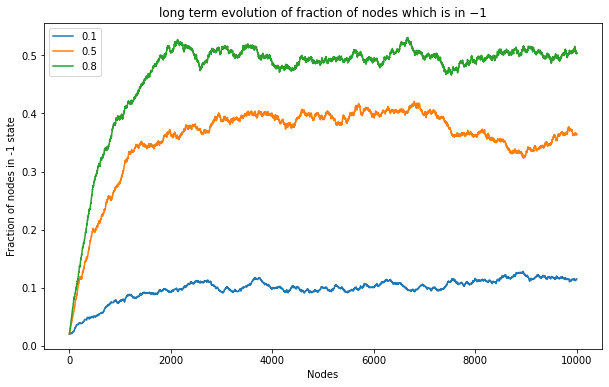

In [ ]:
plt.figure(figsize=(10,6))
for j in range(3):
    plt.plot(ev_minus[j], label = p[j])
    plt.title("long term evolution of fraction of nodes which is in −1")
    plt.xlabel("Nodes")
    plt.ylabel("Fraction of nodes in -1 state")
    plt.legend()

### (b) Plot the evolution of fraction of nodes is in +1 state with respect to time for p = 0.1, 0.5, and 0.9.

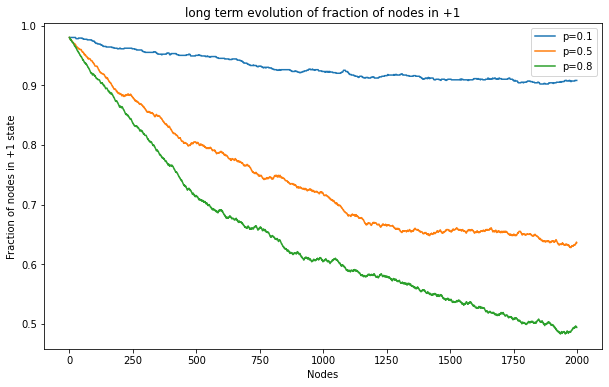

In [ ]:
plt.figure(figsize=(10,6))
for j in range(3):
    plt.plot(ev_pos_2000[j], label = f"p={p[j]}")
    plt.title("long term evolution of fraction of nodes in +1")
    plt.xlabel("Nodes")
    plt.ylabel("Fraction of nodes in +1 state")
    plt.legend()

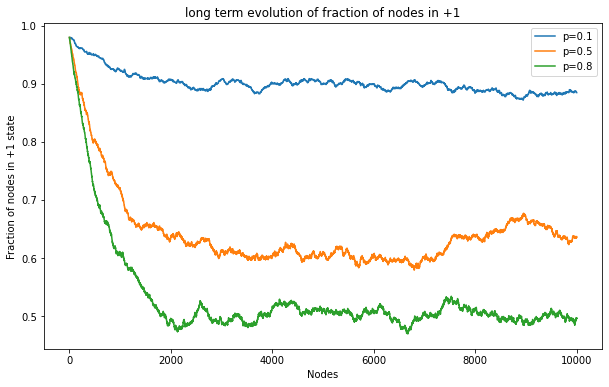

In [ ]:
plt.figure(figsize=(10,6))
for j in range(3):
    plt.plot(ev_pos[j], label = f"p={p[j]}")
    plt.title("long term evolution of fraction of nodes in +1")
    plt.xlabel("Nodes")
    plt.ylabel("Fraction of nodes in +1 state")
    plt.legend()

### (c) By changing p from 0 to 1, plot the fraction of nodes is in -1 (last value of time evolution) state with respect to p.
Run your simulations (for (a), (b) and (c)) using 2000,
and 10000 discrete time steps.

In [ ]:
p_val = np.linspace(0,1,100)
gamma = 0.8
ev_2000 = []
ev_10000 = []
for j in tqdm(range(100)):
    init_state = og_state.copy()
    for i in range(10000):
        random_number = random.randint(0, 999)
        if init_state[random_number] == 1:
            node_index = random_number
            neighbors = np.where(adj_matrix[node_index] == 1)[0]
            if -1 in init_state[neighbors]:
                if np.random.rand() < p_val[j]:
                    init_state[random_number] = -1
        elif init_state[random_number] == -1:
            if np.random.rand() < gamma:
                init_state[random_number] = 1
        if i == 1999:
            ev_2000.append(np.sum(init_state == -1)/n_nodes)
    ev_10000.append(np.sum(init_state == -1)/n_nodes)

100%|██████████| 100/100 [00:20<00:00,  4.82it/s]


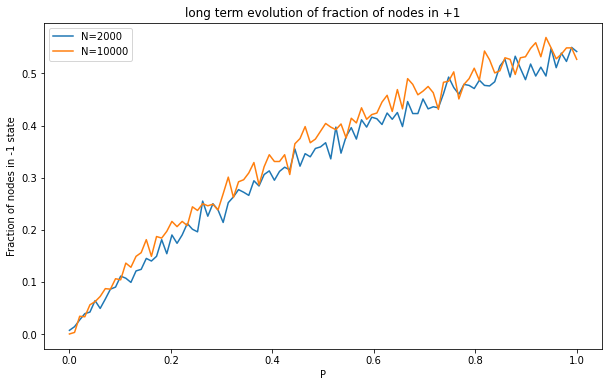

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(p_val,ev_2000, label = "N=2000")
plt.plot(p_val,ev_10000, label = "N=10000")
plt.title("long term evolution of fraction of nodes in +1")
plt.xlabel("P")
plt.ylabel("Fraction of nodes in -1 state")
plt.legend()

## Q4. Create a random graph of size N =1000 by using two protocols:
(I) Create a null graph of N , and then connect edges by a probability p.  
(II) Create a global graph (all to all connected) of N , and remove edges by the given probability p.


### (a) Construct random graphs with probabilities p=0.1, 0.5 and 0.8.

### (b) Plot the largest giant component of the graphs with respect to p (0 to 1).

In [ ]:
def largest_giant_component(adj_matrix):
    n = len(adj_matrix)
    visited = [False] * n
    sizes = []
    for i in range(n):
        if not visited[i]:
            size = 0
            stack = [i]
            while stack:
                node = stack.pop()
                if not visited[node]:
                    visited[node] = True
                    size += 1
                    for j in range(n):
                        if adj_matrix[node][j] == 1 and not visited[j]:
                            stack.append(j)
            sizes.append(size)
    return max(sizes)

In [ ]:
n_nodes = 1000
p_connect =np.linspace(0,1,1000)

gcc_null = []
gcc_global = []

for p in p_connect:
  null_matrix = np.zeros((n_nodes, n_nodes))
  for i in range(n_nodes):
    for j in range(i+1, n_nodes):
      if np.random.rand() < p:
        null_matrix[i, j] = 1
        null_matrix[j, i] = 1

  global_matrix = np.ones((n_nodes, n_nodes))-np.identity(n_nodes)
  for i in range(n_nodes):
    for j in range(i+1, n_nodes):
      if np.random.rand() < p:
        global_matrix[i, j] = 0
        global_matrix[j, i] = 0
  gcc_null.append(largest_giant_component(null_matrix))
  gcc_global.append(largest_giant_component(global_matrix))

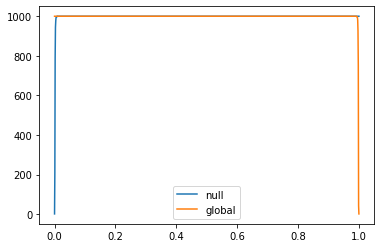

In [ ]:
plt.plot(p_connect, gcc_null,label="null")
plt.plot(p_connect, gcc_global, label ="global")
plt.legend()

## Q5.